In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving Walmart.csv to Walmart.csv


In [ ]:
import pandas as pd
df=pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

In [ ]:
df.shape

(6435, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [ ]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
df.nunique()

,0
Store,45
Date,143
Weekly_Sales,6435
Holiday_Flag,2
Temperature,3528
Fuel_Price,892
CPI,2145
Unemployment,349


In [ ]:
import pandas as pd
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Week']=df['Date'].dt.isocalendar().week
df['Day']=df['Date'].dt.day


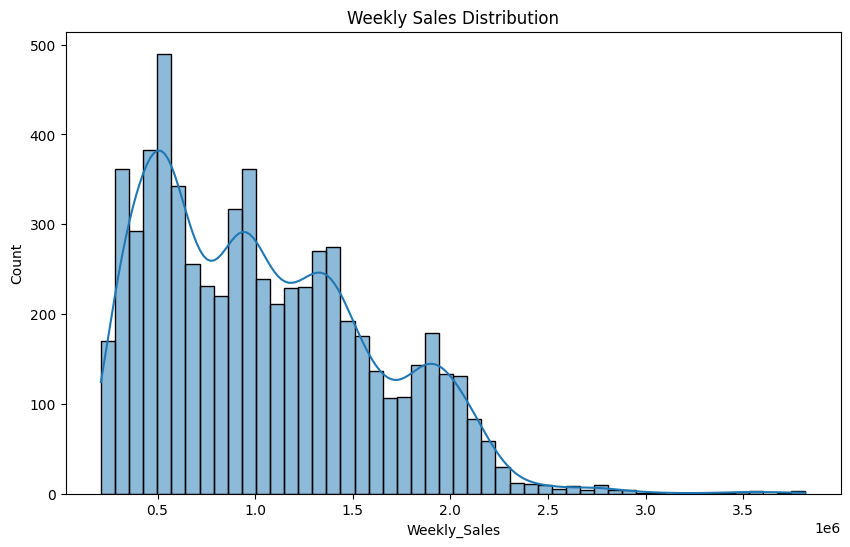

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title('Weekly Sales Distribution')
plt.show()

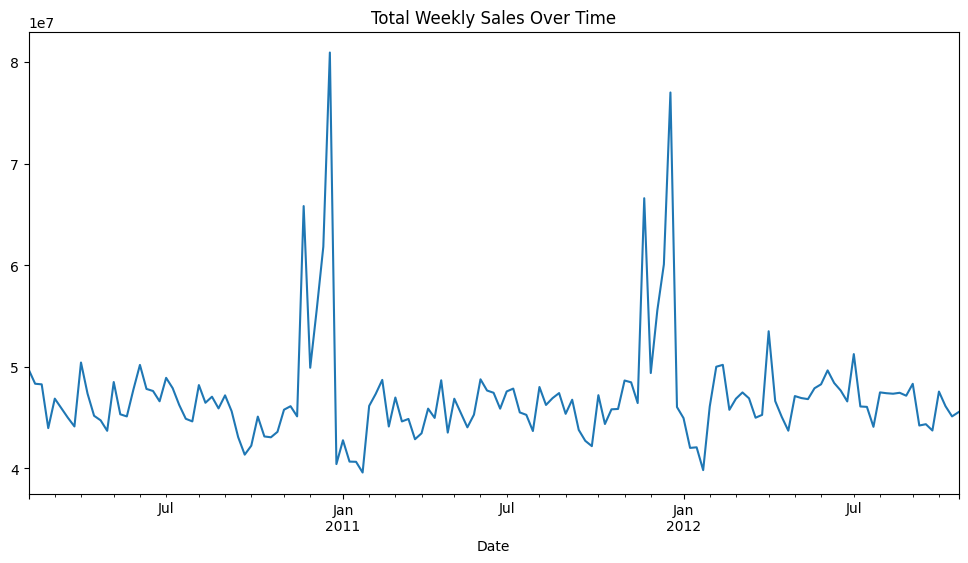

In [ ]:
sales_trend=df.groupby('Date')['Weekly_Sales'].sum()
sales_trend.plot(figsize=(12,6),title='Total Weekly Sales Over Time')
plt.show()

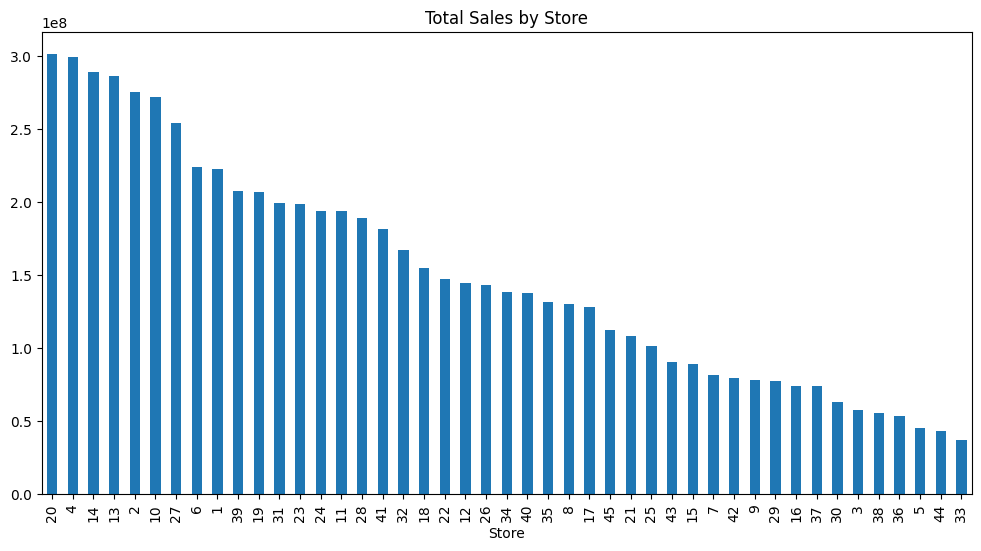

In [ ]:
store_sales=df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
store_sales.plot(kind='bar',figsize=(12,6),title='Total Sales by Store')
plt.show()

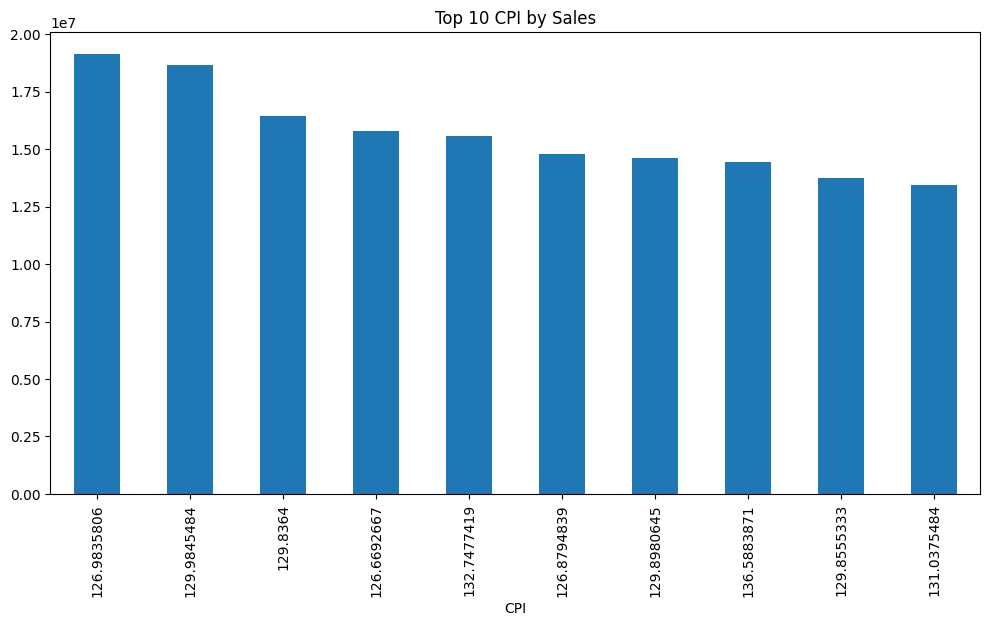

In [ ]:
dept_sales = df.groupby('CPI')['Weekly_Sales'].sum().sort_values(ascending=False)
dept_sales.head(10).plot(kind='bar', figsize=(12,6), title='Top 10 CPI by Sales')
plt.show()

In [ ]:
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
print(holiday_sales)

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64


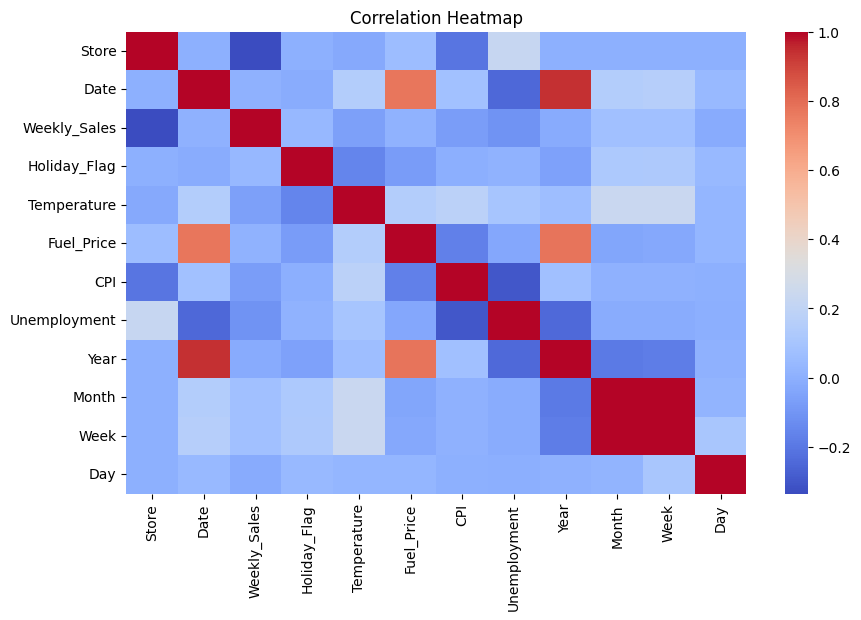

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df = df.sort_values(['Store', 'Date'])
df['Lag_1'] = df.groupby('Store')['Weekly_Sales'].shift(1)
df['Lag_52'] = df.groupby('Store')['Weekly_Sales'].shift(52)
# df['Rolling_4'] = df.groupby(['Store','CPI'])['Weekly_Sales'].shift(1).rolling(4).mean() # Removed for now to simplify

In [ ]:
train_set = df[df['Date'] < '2012-01-01'].copy()
test_set = df[df['Date'] >= '2012-01-01'].copy()

In [ ]:
from sklearn.metrics import mean_absolute_error

baseline_pred = test_set['Lag_52']

# Drop rows with NaN values in either Weekly_Sales or Lag_52 from the test set
test_set_cleaned = test_set.dropna(subset=['Weekly_Sales', 'Lag_52']).copy()

print(f"Shape of test_set_cleaned: {test_set_cleaned.shape}")
print(f"Number of NaNs in test_set['Lag_52'] before dropping: {test_set['Lag_52'].isnull().sum()}")

mae = mean_absolute_error(test_set_cleaned['Weekly_Sales'], test_set_cleaned['Lag_52'])
print(f"Baseline MAE: {mae}")

Shape of test_set_cleaned: (1935, 15)
Number of NaNs in test_set['Lag_52'] before dropping: 0
Baseline MAE: 56549.50281653746


In [ ]:
from xgboost import XGBRegressor

features = ['Store','Year','Month','Week','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','Lag_1','Lag_52']

model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(train_set[features], train_set['Weekly_Sales'])

predictions = model.predict(test_set[features])
print(f"Model MAE: {mean_absolute_error(test_set['Weekly_Sales'], predictions)}")

Model MAE: 55318.73928520672


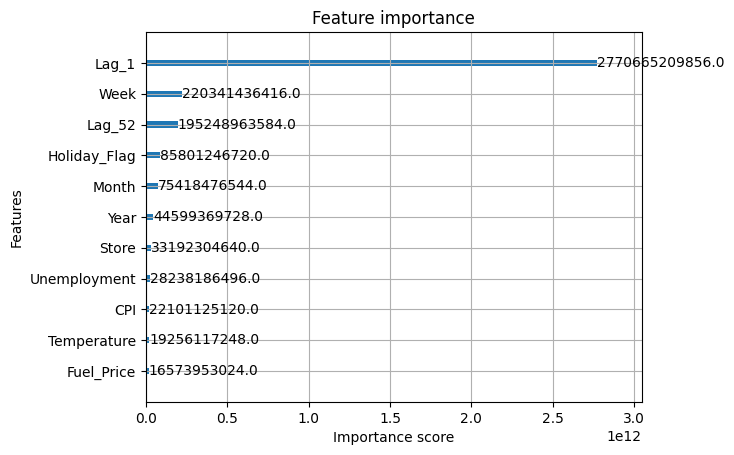

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model, max_num_features=15, importance_type='gain')
plt.show()